In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
data = pd.read_csv('test3.txt', sep=",", header=None)
data.columns = ["Time", "Ask %", "Bid %", "Cross Bid", "Cross Ask", "pair bid", "pair ask"]

# Compute potential cross arbitrage profit
data["Buy_Cross_Sell_Quote"] = ((data["pair bid"]/data["Cross Ask"])-1)*100
data["Buy_Quote_Sell_Cross"] = ((data["Cross Bid"]/data["pair ask"])-1)*100





# Crossrate Arbitrage - GDAX

In [17]:
data.describe()

,Ask %,Bid %,Cross Bid,Cross Ask,pair bid,pair ask,Buy_Cross_Sell_Quote,Buy_Quote_Sell_Cross
count,15456.000000,15456.000000,15456.000000,15456.000000,15456.000000,15456.000000,15456.000000,15456.000000
mean,0.056190,0.020083,401.807029,401.935709,401.582448,401.856916,-0.087820,-0.011784
std,0.132851,0.119489,10.835461,10.863528,10.855697,10.920168,0.135156,0.117973
min,-0.730666,-0.481741,382.382520,382.618295,381.110000,382.020000,-1.349450,-0.772953
25%,-0.045593,-0.067930,399.204650,399.285701,398.450000,398.980000,-0.178672,-0.101009
50%,0.049665,0.011045,402.569095,402.653650,402.125000,402.500000,-0.081036,-0.019967
75%,0.148726,0.105685,405.665530,405.723360,405.790000,405.880000,0.016425,0.073531
max,1.100771,1.094547,438.623090,439.040000,437.990000,438.330000,0.460704,0.828129


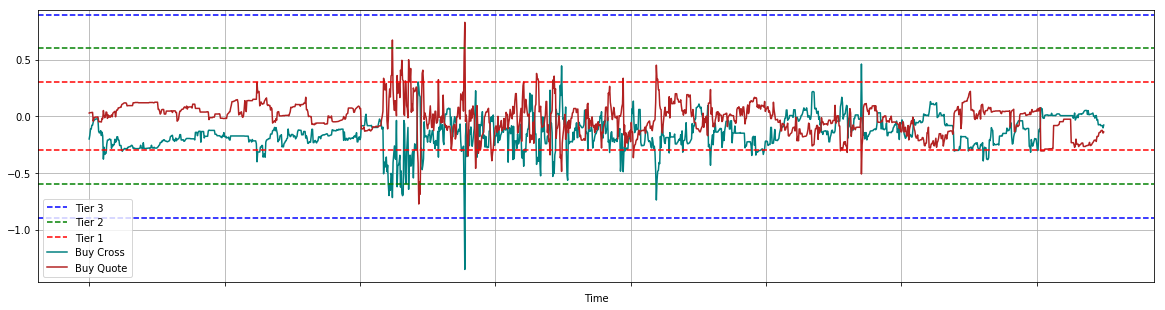

In [20]:

cross_profits = data[-1500:].plot(x="Time", y=["Buy_Cross_Sell_Quote","Buy_Quote_Sell_Cross"],
                                 figsize=(20, 5),
                                 grid=True,
                                 color=["teal", "firebrick"])

# Incorporate fee structure to graph profit thresholds
#Tier 3 Fee Level: 0.003
Tier3_up =plt.axhline((((1-0.003)**3)-1)*-100, ls="dashed", color="b", label="Tier 3")
Tier3_down =plt.axhline(-(((1-0.003)**3)-1)*-100, ls="dashed", color="b", label="Tier 3")

#Tier 2 Fee Level: 0.002
Tier2_up =plt.axhline((((1-0.002)**3)-1)*-100, ls="dashed", color="g", label="Tier 2")
Tier2_down =plt.axhline(-(((1-0.002)**3)-1)*-100, ls="dashed", color="g", label="Tier 2")

#Tier 1 Fee Level: 0.001
Tier1_up =plt.axhline((((1-0.001)**3)-1)*-100, ls="dashed", color="r", label="Tier 1")
Tier1_down =plt.axhline(-(((1-0.001)**3)-1)*-100, ls="dashed", color="r", label="Tier 1")


buy_cross = mlines.Line2D([], [], color='teal', marker='',
                          markersize=15, label='Buy Cross')

buy_quote = mlines.Line2D([], [], color='firebrick', marker='',
                          markersize=15, label='Buy Quote')

plt.legend([Tier3_up, Tier2_up, Tier1_up, buy_cross, buy_quote], ['Tier 3', 'Tier 2', 'Tier 1', "Buy Cross", "Buy Quote"])


